In [306]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix 
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn as skl
warnings.filterwarnings('ignore')
%matplotlib inline

In [307]:
df = pd.read_csv('Columbia.csv', index_col=0) 
#Remember to change this part to the directory of where your csv file is, otherwise it won't work

In [308]:
df.head()

,member_id,CLI,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077430,1314167,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077175,1313524,2400,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1076863,1277178,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075358,1311748,3000,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [309]:
#Removes the NaN values per columns, which is what the axis=1 is for
df = df.dropna(axis=1)
df.head()

,member_id,CLI,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,861.07,0.00,0.00,0.00,171.62,16-Jan,0,1,INDIVIDUAL,0
1077430,1314167,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,435.17,0.00,117.08,1.11,119.66,13-Sep,0,1,INDIVIDUAL,0
1077175,1313524,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,603.65,0.00,0.00,0.00,649.91,16-Jan,0,1,INDIVIDUAL,0
1076863,1277178,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,2209.33,16.97,0.00,0.00,357.48,15-Jan,0,1,INDIVIDUAL,0
1075358,1311748,3000,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,...,1009.07,0.00,0.00,0.00,67.79,16-Jan,0,1,INDIVIDUAL,0


In [310]:
cols_to_drop = ['policy_code', 'initial_list_status', 'collections_12_mths_ex_med', 'pymnt_plan', 'application_type', 'acc_now_delinq', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'recoveries', 'collection_recovery_fee', 'last_credit_pull_d', 'home_ownership']
df.drop(cols_to_drop, axis=1, inplace=True)
df.head()

,member_id,CLI,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,...,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,36 months,10.65,162.87,B,B2,10+ years,24000.0,Verified,...,83.7,9,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,171.62
1077430,1314167,2500,60 months,15.27,59.83,C,C4,< 1 year,30000.0,Source Verified,...,9.4,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,119.66
1077175,1313524,2400,36 months,15.96,84.33,C,C5,10+ years,12252.0,Not Verified,...,98.5,10,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,649.91
1076863,1277178,10000,36 months,13.49,339.31,C,C1,10+ years,49200.0,Source Verified,...,21.0,37,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,357.48
1075358,1311748,3000,60 months,12.69,67.79,B,B5,1 year,80000.0,Source Verified,...,53.9,38,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,67.79


In [311]:
df.shape

(100, 27)

In [328]:
df.describe()

,member_id,CLI,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt
count,1.000000e+02,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.298888e+06,9986.500000,13.020400,302.90740,57573.441900,14.305500,0.080000,0.970000,8.820000,0.040000,...,60.728300,20.180000,209.006600,208.662600,10686.111311,10656.307200,8597.749200,2008.884300,0.959103,2595.705300
std,1.053401e+04,5380.282722,3.956175,163.47233,26999.818922,6.469216,0.393893,1.086696,3.610814,0.196946,...,25.802009,10.355675,784.158403,782.760261,6743.046963,6678.262668,5623.218357,1927.725399,4.259756,3948.083744
min,1.261745e+06,1000.000000,6.030000,35.31000,12252.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,6.700000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298932e+06,6000.000000,10.650000,168.27750,40000.000000,9.807500,0.000000,0.000000,6.000000,0.000000,...,41.757500,11.750000,0.000000,0.000000,5438.655000,5438.655000,4393.750000,694.675000,0.000000,216.947500
50%,1.303455e+06,10000.000000,12.690000,296.20500,50000.000000,14.000000,0.000000,1.000000,8.000000,0.000000,...,62.850000,19.000000,0.000000,0.000000,10381.755000,10381.755000,8350.000000,1440.650000,0.000000,422.375000
75%,1.304264e+06,12425.000000,15.960000,404.72500,75000.000000,20.002500,0.000000,2.000000,11.000000,0.000000,...,82.325000,27.000000,0.000000,0.000000,14079.839593,14079.840000,12000.000000,2432.712500,0.000000,4018.437500
max,1.314167e+06,31825.000000,22.060000,995.82000,150000.000000,29.440000,3.000000,5.000000,20.000000,1.000000,...,99.000000,51.000000,4523.910000,4516.510000,34886.080000,34886.080000,31825.000000,9519.710000,24.170000,16966.700000


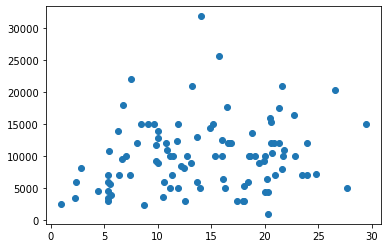

In [314]:
# Scatter plot to check the data, though not very useful here, should delete this cell
x=df['dti']
y=df['CLI']
plt.scatter(x,y)

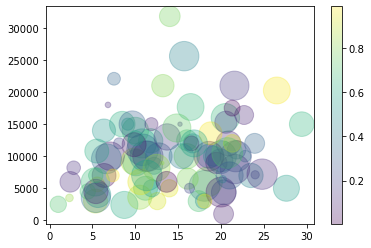

In [315]:
# Plot to see the distribtion of dti vs CLI, also fairly useless
rng=np.random.RandomState(0)
x=df['dti']
y=df['CLI']
colors=rng.rand(100)
sizes=1000*rng.rand(100)
plt.scatter(x,y,c=colors,s=sizes,alpha=.3)
plt.colorbar()

In [316]:
all_data = df
import re
                                                                            
traindf=df

traindf = pd.get_dummies(traindf, columns = ["term","grade","sub_grade","emp_length","verification_status","loan_status"],
                             prefix=["term","grade","sub_grade","emp_length","verification_status","loan_status"])


In [317]:
traindf.head()

,member_id,CLI,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loan_status_Charged Off,loan_status_Current,loan_status_Fully Paid
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,10.65,162.87,24000.0,27.65,0,1,3,0,...,0,0,0,0,0,0,1,0,0,1
1077430,1314167,2500,15.27,59.83,30000.0,1.00,0,5,3,0,...,0,0,0,1,0,1,0,1,0,0
1077175,1313524,2400,15.96,84.33,12252.0,8.72,0,2,2,0,...,0,0,0,0,1,0,0,0,0,1
1076863,1277178,10000,13.49,339.31,49200.0,20.00,0,1,10,0,...,0,0,0,0,0,1,0,0,0,1
1075358,1311748,3000,12.69,67.79,80000.0,17.94,0,0,15,0,...,0,0,0,0,0,1,0,0,1,0


In [318]:
all_features = traindf.drop("CLI",axis=1)
Targeted_feature = traindf["CLI"]

# total of 100 records in dataset
# Divide the data set into two- 70% for train and 30% for test

#X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3)  
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42) 

# Check the train test data set shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((70, 71), (30, 71), (70,), (30,))

In [319]:

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

--------------The Accuracy of the model----------------------------
Accuracy of logistic regression classifier on test set: 0.07


Text(0.5, 1.05, 'Confusion_matrix')

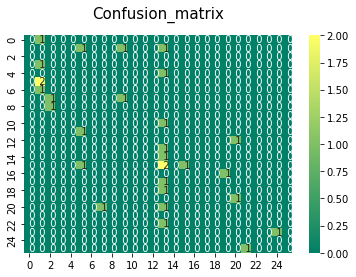

In [320]:
# predict the model output with test data 

y_pred = logreg.predict(X_test)

print('--------------The Accuracy of the model----------------------------')
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [321]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
rf_model.fit(X_train,y_train)
y_pred_rm=rf_model.predict(X_test)

print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Random Forest Classifier is', round(accuracy_score(y_pred_rm,y_test)*100,2))

--------------The Accuracy of the model----------------------------
The accuracy of the Random Forest Classifier is 26.67


In [331]:

test_values = []
pred_values = []

for num in y_test:
    test_values.append(num)

for num in y_pred_rm:
    pred_values.append(num)

# print(test_values)
# print(y_pred_rm)
# print(len(test_values), len(pred_values))


def useTolerance(test_values, pred_values, tolerance):
    # tolerance should be a number between 0 and 1
    correctPredictions = 0
    for i in range(len(test_values)):
        high = pred_values[i] * (1 + tolerance)
        low = pred_values[i] * (1 - tolerance)
        if test_values[i] >= low and test_values[i] <= high:
            correctPredictions += 1
    accuracy = correctPredictions / len(test_values) 
    return accuracy

tolerance = 0.3
print(useTolerance(test_values, pred_values, tolerance))


0.7
